<a href="https://colab.research.google.com/github/ajaykumar6666/Deep-Learning-Perceptron-Implementation/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=load_breast_cancer()

In [3]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [5]:
df['class']=data.target

In [6]:
df['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

In [6]:
df.shape

(569, 31)

In [7]:
y=df['class']

In [8]:
X=df.drop(columns='class')

In [9]:
X.shape,y.shape

((569, 30), (569,))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()

In [14]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [72]:
class perceptron():
  def __init__(self):
    self.w=None
    self.b=None

  def model(self,x):  #model is for a single given input
    return 1 if (np.dot(self.w,x)>=self.b) else 0

  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y,epochs=1):
    accuracy={}
    max_accuracy=0
    self.w=np.ones(X_train.shape[1])
    self.b=0
    for i in range(epochs):  
        for x,y in zip(X,Y):
          y_pred=self.model(x)
          if(y==1 and y_pred==0):
            self.w=self.w+x
            self.b=self.b+1
          if(y==0 and y_pred==1):
            self.w=self.w-x
            self.b=self.b-1
        accuracy[i]=accuracy_score(self.predict(X),Y)
        if(accuracy[i]>max_accuracy):
          max_accuracy=accuracy[i]
          chkptw=self.w
          chkptb=self.b
        self.w=chkptw
        self.b=chkptb
    print(max_accuracy)
    #print(accuracy.values())
    plt.plot(list(accuracy.values()))

In [73]:
p=perceptron()

0.9494505494505494


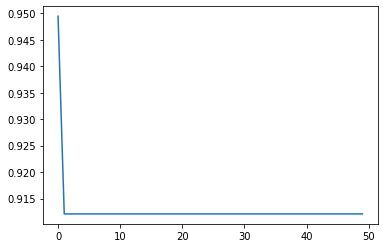

In [74]:
p.fit(X_train,y_train,epochs=50)

In [66]:
from sklearn.metrics import accuracy_score

In [75]:
y_pred=p.predict(X_test)
x_pred=p.predict(X_train)
print("Test",accuracy_score(y_test,y_pred))
print("Train",accuracy_score(y_train,x_pred))

Test 0.9385964912280702
Train 0.9494505494505494
